# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Bandit Machine - Experiment 1

## Download Corpus from GitHub (only for Colab)

In [2]:
import sys
import os

in_colab: bool = 'google.colab' in sys.modules
if in_colab:
    print('Is running in Colab')
    if not os.path.isdir('machine_learning'):
        print("Downloading project")
        get_ipython().system('git clone https://github.com/dayan3847/machine_learning')
        sys.path.insert(0, './machine_learning/')
    else:
        get_ipython().system('git -C ./machine_learning fetch')
        get_ipython().system('git -C ./machine_learning rebase')
else:
    print('Is not running in Colab')

Is not running in Colab


## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dayan3847.bandit.src.BanditMachine import BanditMachine, BanditMachineAction
from dayan3847.bandit.src.BanditMachinePlayer import BanditMachinePlayerEpsilonGreedy

## Create Bandit Machine

In [3]:
banditMachine: BanditMachine = BanditMachine(10)

## Plot The Bandit Machine

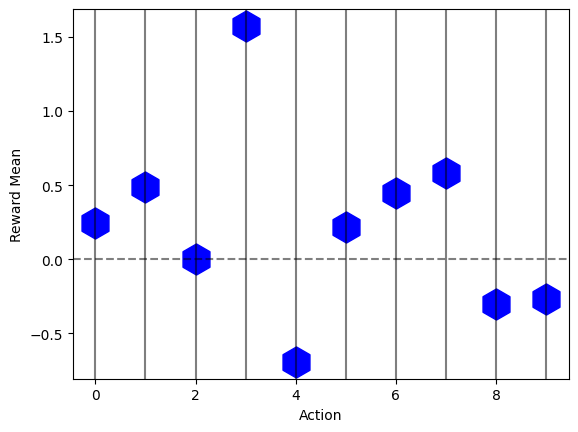

In [5]:
def plot_bandit_machine():
    x = range(banditMachine.n_actions)
    y = [action.median for action in banditMachine.action_list]
    y = np.array(y)
    plt.xlabel('Action')
    plt.ylabel('Reward Mean')
    plt.scatter(x, y, color='blue', marker='h', s=500)

    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    for xi in x:
        plt.axvline(x=xi, color='black', linestyle='-', alpha=0.5)
    plt.show()


plot_bandit_machine()

In [6]:
optimal_action_id: int = banditMachine.get_optimal_action()
optimal_action_id

3

In [7]:
optimal_action: BanditMachineAction = banditMachine.action_list[optimal_action_id]
print('optimal_action.median: ', optimal_action.median)

optimal_action.median:  1.574290650193534


## Create Player

In [8]:
banditMachinePlayerEpsilonGreedy = BanditMachinePlayerEpsilonGreedy(banditMachine, epsilon=0, q1=5)

## Play

In [9]:
iterations = range(1000)
rewards = [0]
rewards_accumulated = [0]
optimal_actions = [0]
q_bests = [banditMachinePlayerEpsilonGreedy.best_q]
for i in iterations[1:]:
    reward, a = banditMachinePlayerEpsilonGreedy.play()
    rewards.append(reward)
    rewards_accumulated.append(rewards_accumulated[i - 1] + reward)
    optimal_actions.append(1 if (a == optimal_action_id) else 0)
    q_bests.append(banditMachinePlayerEpsilonGreedy.best_q)

## Plot Results

### Plot Rewards Accumulated

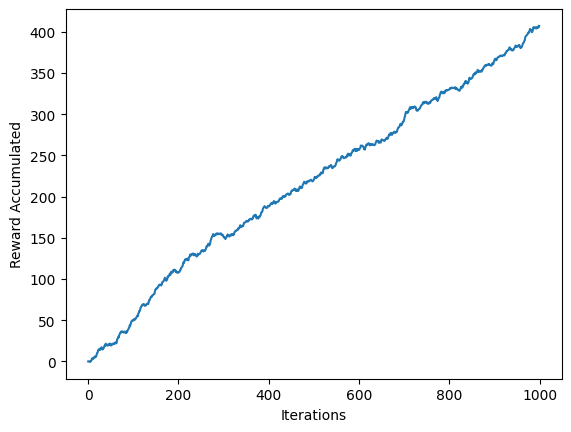

In [11]:
plt.xlabel('Iterations')
plt.ylabel('Reward Accumulated')
plt.plot(iterations, rewards_accumulated, label='epsilon greedy')
plt.show()

### Plot Rewards

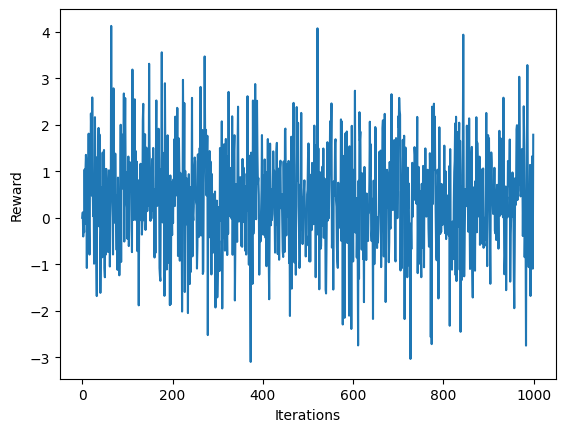

In [10]:
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.plot(iterations, rewards, label='epsilon greedy')
plt.show()

### Plot Best Q

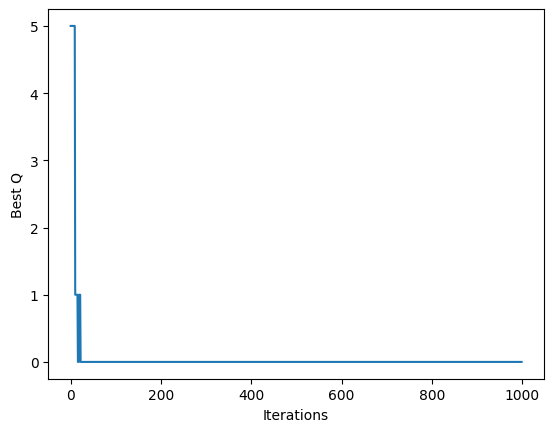

In [12]:
plt.xlabel('Iterations')
plt.ylabel('Best Q')
plt.plot(iterations, q_bests, label='best q')
plt.show()

### Plot Optimal Action

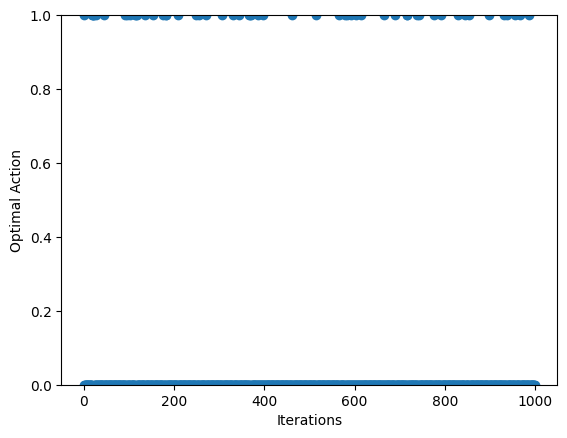

In [13]:
plt.xlabel('Iterations')
plt.ylabel('Optimal Action')
plt.scatter(iterations, optimal_actions, label='epsilon greedy')
plt.ylim(0, 1)
plt.show()

In [14]:
print('optimal_actions: ', sum(optimal_actions))

optimal_actions:  55
